# Student Marks prediction

In [65]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset :-

In [66]:
# Loading the Data
path = r"student_info.csv"
df  = pd.read_csv(path)

In [67]:
#Access First 5 Rows
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [68]:
# Access Last 5 Rows
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [69]:
# Checking the Shape
df.shape

(200, 2)

### Now visualize the data :-

In [70]:
#Checking Detailed information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [71]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


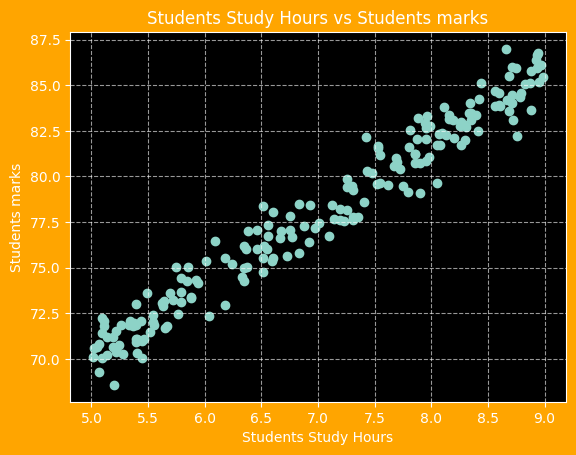

In [72]:
#Visualise The Data
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Students Study Hours vs Students marks")
plt.gcf().set_facecolor('orange')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Prepare the data for Machine Learning algorithms 

### --> Data Cleaning

In [73]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [74]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [75]:
df2 = df.fillna(df.mean())

In [76]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [77]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


### --> Now Split the Dataset

In [78]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=48)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


### Now Select a model and train it, you can also use different model but I'm using LR model: 

In [80]:
 # y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
lr.coef_

array([[3.87059911]])

In [83]:
lr.intercept_

array([50.88773882])

In [84]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [85]:
lr.predict([[4]])[0][0].round(2)

c:\Users\Sanyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.37

In [86]:
y_pred  = lr.predict(X_test)
y_pred

array([[72.67921181],
       [71.71156204],
       [77.96625171],
       [70.58908829],
       [85.41348289],
       [75.38863119],
       [85.49089487],
       [77.32393075],
       [84.60065708],
       [70.78261825],
       [75.46604317],
       [70.66650028],
       [81.4654718 ],
       [70.97614821],
       [71.09226618],
       [77.01428282],
       [71.09226618],
       [76.08533903],
       [84.21359716],
       [80.03335013],
       [81.11711788],
       [76.6659289 ],
       [80.38170405],
       [83.47818333],
       [78.98828837],
       [83.01371144],
       [81.81382572],
       [71.0148542 ],
       [71.67285605],
       [80.65264598],
       [71.55673807],
       [76.39498696],
       [84.17489117],
       [85.25865892],
       [71.78897402],
       [79.33664229],
       [72.25344591],
       [74.45968741],
       [72.36956389],
       [75.46604317]])

### Now I created DataFrame of predicted data and save into xlsx file named (predicted_data.xlsx):

In [87]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.630000,72.87,72.679212
1,5.380000,71.94,71.711562
2,6.995949,76.14,77.966252
3,5.090000,70.05,70.589088
4,8.920000,86.41,85.413483
5,6.330000,74.49,75.388631
6,8.940000,86.75,85.490895
7,6.830000,75.80,77.323931
8,8.710000,84.03,84.600657
9,5.140000,71.22,70.782618


In [88]:
predicted_df=pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])
predicted_df.to_excel("predicted_data.xlsx", index=False)

### Fine-tune your model

In [89]:
lr.score(X_test,y_test)

0.9608624102489438

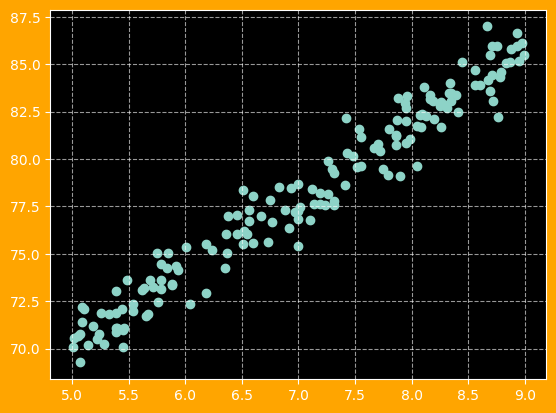

In [90]:
plt.scatter(X_train,y_train)
plt.gcf().set_facecolor('orange')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', alpha=0.6)


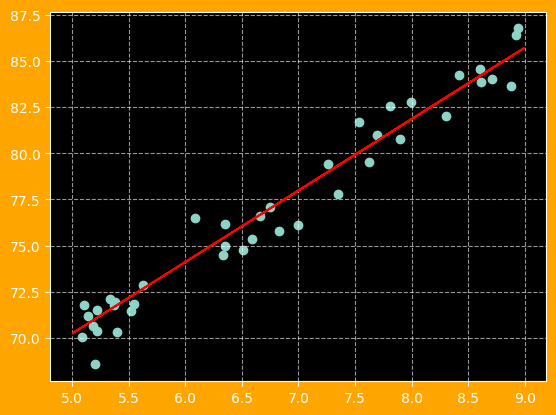

In [91]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")
plt.gcf().set_facecolor('orange')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Present your solution:

### Save Ml Model:-

In [92]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [93]:
model = joblib.load("student_mark_predictor.pkl")

In [94]:
model.predict([[5]])[0][0]

c:\Users\Sanyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.24073437466947